<a href="https://colab.research.google.com/github/Marlburo/pycaret_test_cal_housing/blob/main/pycarte4housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
#!pip install pycaret
import pycaret

In [5]:
 from pycaret.utils import enable_colab 
 enable_colab()

Colab mode enabled.


In [9]:
cal_hou_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
cal_hou_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [8]:
cal_hou_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [13]:
cal_hou_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [12]:
cal_hou_train.shape

(17000, 9)

In [14]:
from pycaret.regression import *
exp_reg101 = setup(data = cal_hou_train, target = 'median_house_value', session_id=123)

,Description,Value
0,session_id,123
1,Target,median_house_value
2,Original Data,"(17000, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11899, 8)"


In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32267.0934,2.277357e+09,47688.8101,0.8300,0.2373,0.1818,0.226
rf,Random Forest Regressor,33056.4238,2.521143e+09,50173.3539,0.8120,0.2410,0.1833,5.530
et,Extra Trees Regressor,35984.8739,2.859471e+09,53437.6739,0.7867,0.2541,0.2003,2.343
gbr,Gradient Boosting Regressor,38027.4075,2.972777e+09,54495.0921,0.7781,0.2700,0.2163,1.629
lr,Linear Regression,50806.2992,4.765647e+09,69010.8273,0.6445,0.4369,0.3039,0.290
lasso,Lasso Regression,50806.1688,4.765647e+09,69010.8234,0.6445,0.4368,0.3039,0.049
ridge,Ridge Regression,50805.9473,4.765645e+09,69010.8070,0.6445,0.4364,0.3039,0.015
br,Bayesian Ridge,50804.5447,4.765650e+09,69010.8145,0.6445,0.4350,0.3039,0.018
llar,Lasso Least Angle Regression,50816.9164,4.766263e+09,69015.4251,0.6444,0.4275,0.3039,0.018
dt,Decision Tree Regressor,45171.3892,4.989609e+09,70587.6023,0.6279,0.3294,0.2450,0.104


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [17]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32146.4659,2.239022e+09,47318.3068,0.8365,0.2404,0.1840
1,32580.8581,2.398530e+09,48974.7925,0.8179,0.2318,0.1769
2,32363.5071,2.328068e+09,48250.0613,0.8137,0.2453,0.1882
3,33815.4937,2.437987e+09,49375.9735,0.8210,0.2431,0.1887
4,32868.3294,2.434835e+09,49344.0481,0.8213,0.2343,0.1758
5,32820.1643,2.433616e+09,49331.6898,0.8218,0.2486,0.1895
6,31383.5675,2.220753e+09,47124.8680,0.8251,0.2290,0.1708
7,31241.4318,1.992540e+09,44637.8761,0.8547,0.2378,0.1849
8,30689.5741,1.967628e+09,44357.9532,0.8574,0.2244,0.1744
9,32761.5422,2.320593e+09,48172.5319,0.8300,0.2381,0.1847


In [18]:
print(lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34216.7653,2.708497e+09,52043.2253,0.8023,0.2468,0.1883
1,33379.3535,2.696198e+09,51924.9242,0.7953,0.2404,0.1782
2,32083.5071,2.362180e+09,48602.2618,0.8110,0.2437,0.1863
3,33955.0292,2.607025e+09,51059.0350,0.8086,0.2457,0.1873
4,32732.3698,2.552766e+09,50524.9048,0.8127,0.2308,0.1716
5,34413.0701,2.784320e+09,52766.6549,0.7961,0.2557,0.1950
6,32131.4561,2.374150e+09,48725.2518,0.8130,0.2329,0.1757
7,32293.7414,2.178201e+09,46671.1983,0.8412,0.2381,0.1863
8,31419.9285,2.297392e+09,47931.1125,0.8336,0.2334,0.1781
9,33939.0173,2.650702e+09,51484.9707,0.8058,0.2423,0.1867


In [20]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [23]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,52011.1406,4.851855e+09,69655.2578,0.6458,0.4599,0.3124
1,49525.0508,4.803996e+09,69310.8672,0.6353,0.4349,0.2924
2,50429.7148,4.642269e+09,68134.1953,0.6285,0.4628,0.3106
3,52813.5312,5.050176e+09,71064.5938,0.6292,0.4359,0.3144
4,51046.1797,4.951487e+09,70366.8047,0.6367,0.4405,0.2965
5,51853.6328,5.036508e+09,70968.3594,0.6312,0.3833,0.3032
6,49942.6523,4.561877e+09,67541.6719,0.6408,0.4201,0.3016
7,49229.3320,4.417637e+09,66465.3047,0.6779,0.4156,0.2997
8,49801.6992,4.354116e+09,65985.7266,0.6845,0.4533,0.2989
9,51410.0586,4.986548e+09,70615.4922,0.6346,0.4631,0.3096


In [24]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,52011.2188,4.851857e+09,69655.2734,0.6458,0.4602,0.3124
1,49524.9023,4.804038e+09,69311.1641,0.6353,0.4347,0.2924
2,50429.5625,4.642237e+09,68133.9609,0.6285,0.4629,0.3106
3,52814.0625,5.050250e+09,71065.1094,0.6292,0.4359,0.3144
4,51046.1289,4.951474e+09,70366.7109,0.6367,0.4405,0.2965
5,51853.5117,5.036471e+09,70968.0938,0.6312,0.3833,0.3032
6,49942.2031,4.561837e+09,67541.3750,0.6408,0.4201,0.3016
7,49229.3828,4.417624e+09,66465.2031,0.6779,0.4156,0.2997
8,49801.1836,4.354116e+09,65985.7266,0.6845,0.4533,0.2989
9,51410.0703,4.986557e+09,70615.5625,0.6346,0.4625,0.3096


In [21]:
tuned_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32687.5797,2.300066e+09,47959.0071,0.8321,0.2466,0.1884
1,32376.0365,2.293975e+09,47895.4544,0.8258,0.2361,0.1799
2,32272.0894,2.203878e+09,46945.4744,0.8236,0.2482,0.1906
3,33357.1526,2.331691e+09,48287.5880,0.8288,0.2556,0.1906
4,32172.4303,2.370414e+09,48686.9013,0.8261,0.2551,0.1820
5,32870.6085,2.348470e+09,48461.0187,0.8280,0.2613,0.1945
6,31392.7094,2.161542e+09,46492.3834,0.8298,0.2388,0.1785
7,30773.2229,1.887193e+09,43441.8397,0.8624,0.2521,0.1872
8,31868.8515,2.034801e+09,45108.7671,0.8526,0.2424,0.1825
9,32461.9258,2.162659e+09,46504.4015,0.8415,0.2441,0.1891


In [22]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38701.0183,3.272743e+09,57207.8936,0.7611,0.2725,0.2164
1,38374.5080,3.325748e+09,57669.2980,0.7475,0.2667,0.2078
2,37051.3073,2.816169e+09,53067.5849,0.7746,0.2689,0.2179
3,39625.2073,3.375324e+09,58097.5364,0.7522,0.2748,0.2181
4,38632.7443,3.378066e+09,58121.1294,0.7521,0.2648,0.2061
5,38868.8074,3.253634e+09,57040.6311,0.7617,0.2756,0.2223
6,37230.6310,2.948006e+09,54295.5429,0.7679,0.2593,0.2066
7,37713.6646,2.824787e+09,53148.7285,0.7941,0.2649,0.2183
8,36173.0211,2.801738e+09,52931.4456,0.7970,0.2535,0.2031
9,39204.6608,3.341955e+09,57809.6455,0.7551,0.2714,0.2188


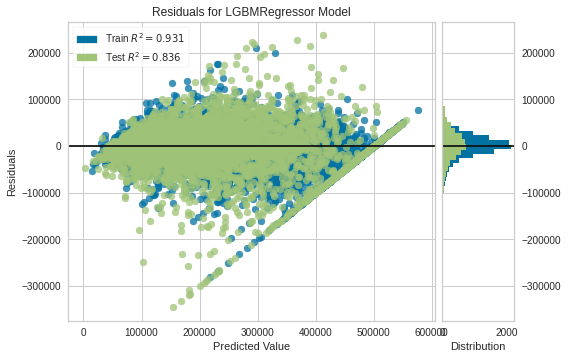

In [25]:
plot_model(tuned_lgbm)

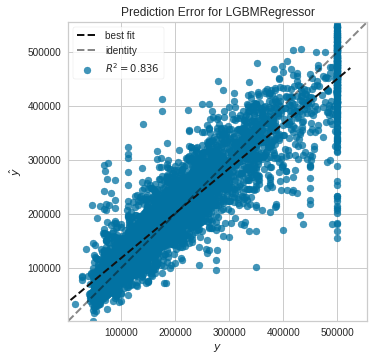

In [26]:
plot_model(tuned_lgbm, plot='error')

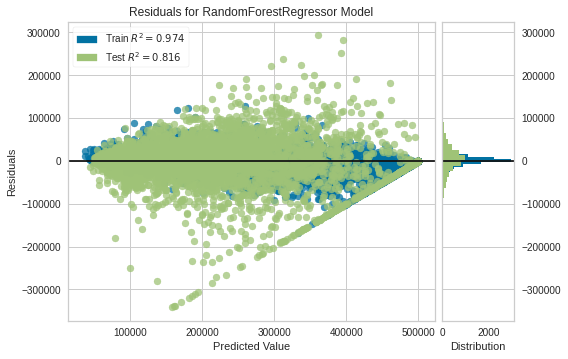

In [27]:
plot_model(rf)

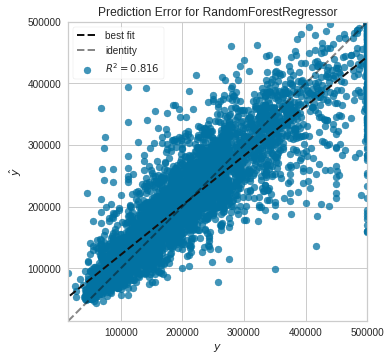

In [28]:
plot_model(rf, plot='error')

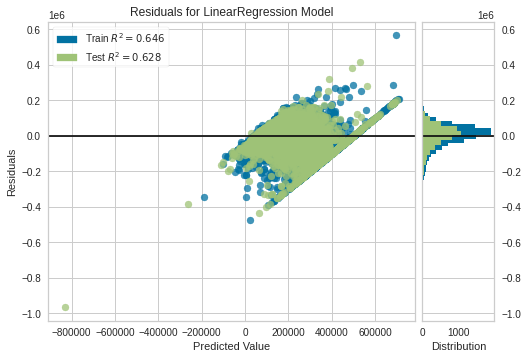

In [29]:
plot_model(tuned_lr)

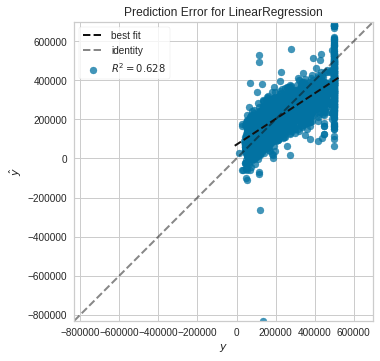

In [30]:
plot_model(lr, plot='error')

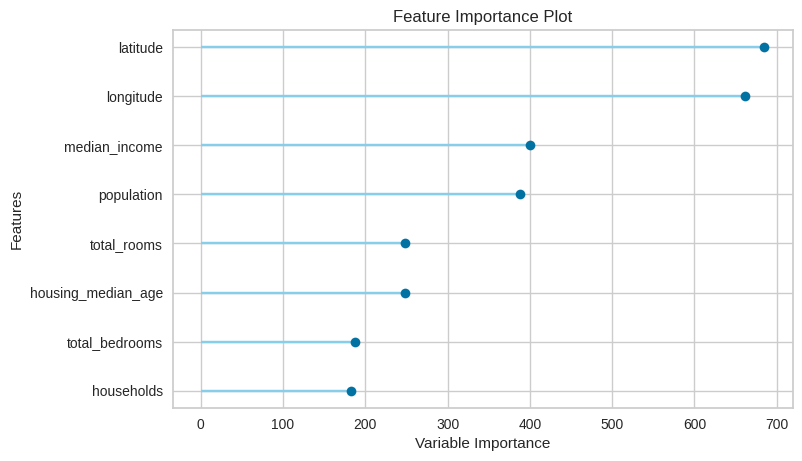

In [31]:
plot_model(lgbm, plot='feature')

In [32]:
predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,32003.7622,2.226124e+09,47181.8152,0.8355,0.2457,0.1822


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Label
0,-117.070000,32.610001,22.0,5016.0,1331.0,3222.0,1196.0,2.1441,135500.0,146882.953122
1,-122.080002,37.930000,35.0,4043.0,689.0,1832.0,662.0,5.0761,233200.0,223734.160148
2,-117.889999,33.919998,14.0,1562.0,373.0,609.0,328.0,2.3935,125000.0,212465.074460
3,-121.510002,38.490002,21.0,4426.0,790.0,1856.0,761.0,4.1000,158300.0,182911.834442
4,-117.930000,34.090000,35.0,1891.0,353.0,1093.0,382.0,4.0167,165500.0,168509.665352
...,...,...,...,...,...,...,...,...,...,...
5096,-122.019997,37.950001,25.0,1205.0,260.0,608.0,272.0,2.4519,208300.0,139355.101053
5097,-118.489998,34.259998,25.0,8389.0,1872.0,4483.0,1747.0,3.5497,261300.0,241781.368162
5098,-117.989998,33.820000,33.0,2342.0,475.0,1367.0,509.0,4.1167,215500.0,195761.736319
5099,-119.730003,36.590000,31.0,1551.0,296.0,1058.0,287.0,3.3438,92600.0,85792.279461


In [33]:
predict_model(tuned_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,51046.078125,5.031634e+09,70934.007812,0.6282,0.4154,0.3064


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Label
0,-117.070000,32.610001,22.0,5016.0,1331.0,3222.0,1196.0,2.1441,135500.0,185900.25
1,-122.080002,37.930000,35.0,4043.0,689.0,1832.0,662.0,5.0761,233200.0,270503.00
2,-117.889999,33.919998,14.0,1562.0,373.0,609.0,328.0,2.3935,125000.0,147103.75
3,-121.510002,38.490002,21.0,4426.0,790.0,1856.0,761.0,4.1000,158300.0,178856.75
4,-117.930000,34.090000,35.0,1891.0,353.0,1093.0,382.0,4.0167,165500.0,208309.75
...,...,...,...,...,...,...,...,...,...,...
5096,-122.019997,37.950001,25.0,1205.0,260.0,608.0,272.0,2.4519,208300.0,153311.75
5097,-118.489998,34.259998,25.0,8389.0,1872.0,4483.0,1747.0,3.5497,261300.0,249235.50
5098,-117.989998,33.820000,33.0,2342.0,475.0,1367.0,509.0,4.1167,215500.0,230320.25
5099,-119.730003,36.590000,31.0,1551.0,296.0,1058.0,287.0,3.3438,92600.0,137608.50


In [34]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,37434.0731,3.083110e+09,55525.762,0.7722,0.2623,0.2089


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Label
0,-117.070000,32.610001,22.0,5016.0,1331.0,3222.0,1196.0,2.1441,135500.0,114849.675559
1,-122.080002,37.930000,35.0,4043.0,689.0,1832.0,662.0,5.0761,233200.0,269716.626418
2,-117.889999,33.919998,14.0,1562.0,373.0,609.0,328.0,2.3935,125000.0,163698.644566
3,-121.510002,38.490002,21.0,4426.0,790.0,1856.0,761.0,4.1000,158300.0,154931.371037
4,-117.930000,34.090000,35.0,1891.0,353.0,1093.0,382.0,4.0167,165500.0,195376.531092
...,...,...,...,...,...,...,...,...,...,...
5096,-122.019997,37.950001,25.0,1205.0,260.0,608.0,272.0,2.4519,208300.0,117589.608663
5097,-118.489998,34.259998,25.0,8389.0,1872.0,4483.0,1747.0,3.5497,261300.0,217728.336223
5098,-117.989998,33.820000,33.0,2342.0,475.0,1367.0,509.0,4.1167,215500.0,205774.397161
5099,-119.730003,36.590000,31.0,1551.0,296.0,1058.0,287.0,3.3438,92600.0,106159.070695


In [35]:
final_lgbm = finalize_model(tuned_lgbm)

In [36]:
test_predictions = predict_model(final_lgbm, data=cal_hou_test)
submission = test_predictions[['latitude', 'longitude']]
submission.columns = ['median_income','median_house_value']
submission.to_csv('submission.csv', index=False)

In [37]:
import seaborn as sns

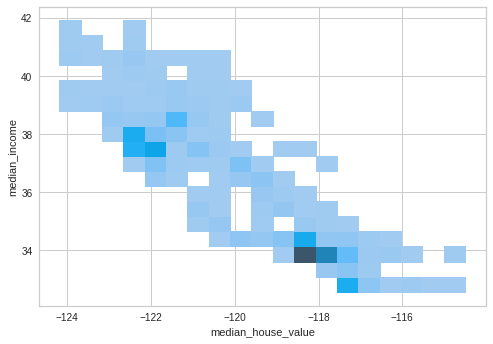

In [50]:
sns.histplot(data=submission, x="median_house_value",y = 'median_income' ,binwidth=None)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


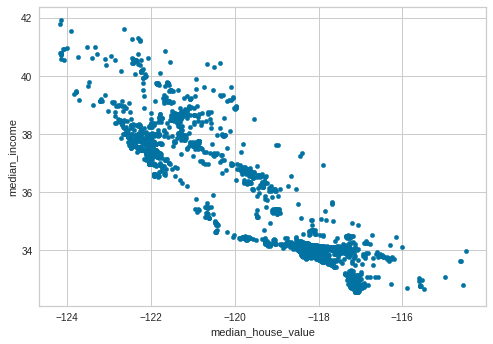

In [57]:
submission.plot.scatter(x='median_house_value', y='median_income')